In [1]:
import numpy as np
import corner
import emcee
import matplotlib.pyplot as plt

In [2]:
read = emcee.backends.HDFBackend("jam_axi_rms_2.h5")

In [3]:
#Get all chains of Emcee.
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

chain = read.get_chain()   

In [4]:
#Get all log_probabilities
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

log_prob = read.get_log_prob()
print(np.where(log_prob == log_prob.max()))
print(log_prob.max())

(array([1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930]), array([32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
       32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
       32, 32, 32]))
-11.528838507442742


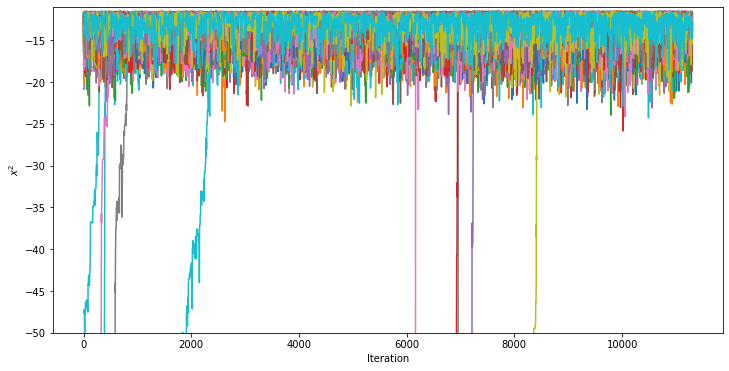

In [5]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(-50)
    plt.ylabel("$ x^2 $")
    plt.xlabel("Iteration")

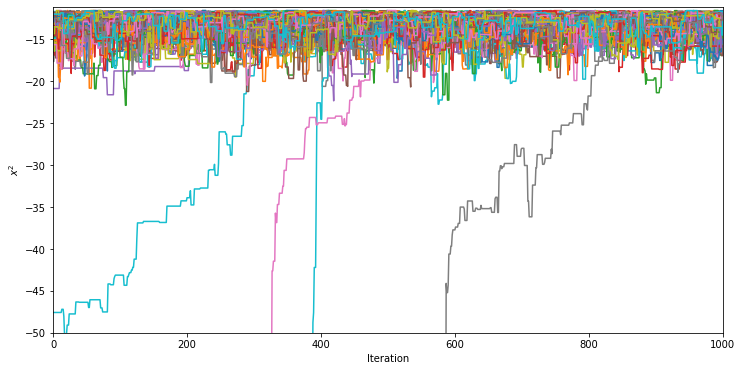

In [10]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(-50)
    plt.xlim(0,1000)
    plt.ylabel("$ x^2 $")
    plt.xlabel("Iteration")

In [6]:
#Get the number of accepted values
#E.g, accepted[10] = 2, means walker 10 was accepted 2 times

accepted = read.accepted
print("Number of accepted walkers:",np.count_nonzero(accepted))
accepted

Number of accepted walkers: 120


array([3697., 3643., 3703., 3675., 3684., 3729., 3773., 3614., 3670.,
       3736., 3773., 3573., 3641., 3765., 2155., 3690., 3607., 3730.,
       3623., 3637., 3752., 3682., 3616., 3773., 3617., 3705., 3531.,
       3625., 3809., 3724., 3724., 3695., 3536., 3734., 3666., 3752.,
       3736., 3593., 3655., 3601., 3700., 3658., 3745., 3637., 3710.,
       3587., 2537., 3593., 1711., 3685., 3647., 3662., 3797., 3680.,
       3777., 3620., 3723., 3712., 3554., 3698., 3661., 3652., 3684.,
       3688., 3453., 3710., 3768., 2404., 3734., 3663., 3743., 3655.,
       3664., 2449., 3641., 3695., 3728., 3668., 3598., 3707., 3678.,
       3699., 3703., 3691., 3696., 3785., 3737., 3737., 3714., 3797.,
       3559., 3697., 3753., 3620., 3692., 3671., 3654., 3580., 3715.,
       3689.,   52., 3701., 3659., 3730., 3731., 3693., 3724., 3715.,
       3669., 3735., 3685., 3640.,  119., 3651., 3679., 3670., 3601.,
       3703., 3733., 3745.])

[110.74004031 109.74441773 110.34927527  76.27252691]
flat chain shape: (240, 4)
flat log prob shape: (240,)


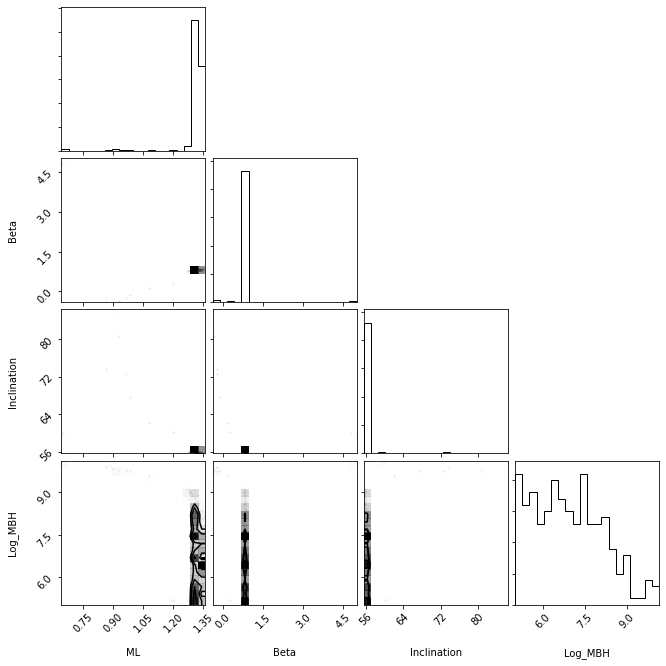

In [15]:
#Corner plots

labels = ["ML", "Beta", "Inclination", "Log_MBH"]

tau = read.get_autocorr_time(tol=0)
print(tau)
samples = read.get_chain(discard=1000, flat=True, thin=5000)
log_prob_samples = read.get_log_prob(discard=1000,flat=True,  thin=5000)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels);

In [8]:
tau = read.get_autocorr_time()
tau

array([110.74004031, 109.74441773, 110.34927527,  76.27252691])

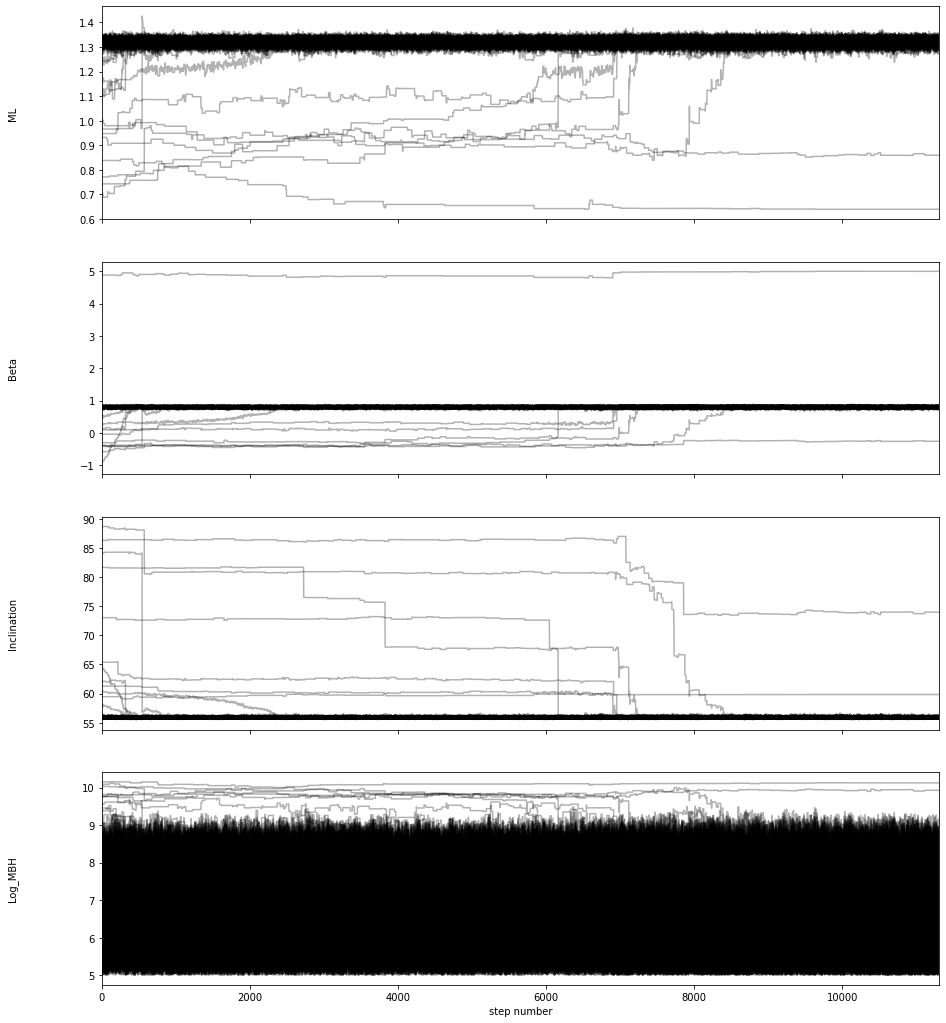

In [9]:
#Walke of each walker
fig, axes = plt.subplots(len(labels)-1, figsize=(15, 18), sharex=True)
samples = read.get_chain()

for i in range(len(labels)-1):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)


axes[-1].set_xlabel("step number");

In [18]:
it, accep_tot, time, accep_100 = np.loadtxt("Output_LogFile.txt", unpack=True)

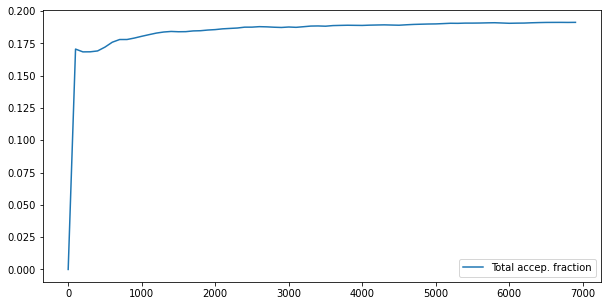

In [19]:
#Plot accep_tot vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_tot, label="Total accep. fraction")
plt.legend()

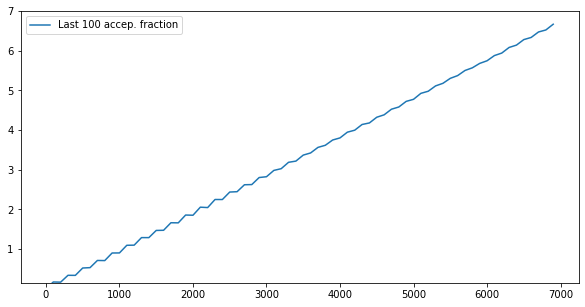

In [20]:
#Plot accep_100 vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_100, label="Last 100 accep. fraction")
plt.ylim(0.15,)
plt.legend()